In [1]:
import pandas as pd
from tqdm import tqdm

# 전처리

In [2]:
df_news = pd.read_csv('./data/news_2020.csv')

df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁\n\n...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] \n\n\n\n(서울=뉴스1) 임세영 기자 = 곽상도 자...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과\n\n\n\n열린민주당 정봉주 최고위원(사진)이 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [3]:
df_news[df_news['content'] == 'No content available']

,title,content
4149,"[21대 총선] 광주 동남갑, '3선 장병완' 민주당 도전 막아낼까",No content available
4296,"'암벽여제' 김자인, 남편 민주당 입당에 ""믿고 응원""",No content available
5594,"'욱토크' 박지원 ""문재인 정부, 제일 못하는 건 청년실업 문제""",No content available
5596,"'욱토크' 박지원 ""홍준표, 친분 있지만 사이 나쁘다…나한테 못 당해""",No content available
5677,"정민당 ""'음원사재기' 송하예 소속사 고발""...송하예 측 ""사실무근·법적대응""",No content available
...,...,...
88799,'황교안을 향한 손짓',No content available
88976,이낙연 위원장 '황기철 후보 믿어주세요',No content available
92764,유세하는 이낙연,No content available
96636,"연매협 ""김근태 후보, 연예인 이용 이슈몰이…직접 소명해야""",No content available


## 필요없는 문자 제거

In [4]:
df_news = df_news[df_news['content'] != 'No content available']
df_news = df_news.drop_duplicates(subset = ['title'])
df_news = df_news.copy()
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁\n\n...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] \n\n\n\n(서울=뉴스1) 임세영 기자 = 곽상도 자...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과\n\n\n\n열린민주당 정봉주 최고위원(사진)이 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [5]:
df_news['content'] = df_news['content'].str.replace('\n', ' ')
df_news['content'] = df_news['content'].str.replace('/', ' ')


df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


## 후보 이름을 당으로 변환

In [7]:
people_df = pd.read_csv('./data/2020_후보결과.csv')

people_df

,name,party
0,이낙연,더불어민주당
1,고민정,더불어민주당
2,황교안,미래통합당
3,홍준표,무소속
4,배현진,미래통합당
...,...,...
1398,정해정,민생당
1399,조성실,정의당
1400,조환기,민생당
1401,진용우,국민의당


In [8]:
# 사전으로 만들기(key : 이름, value : 당)

name_party_dic = dict(zip(people_df['name'], people_df['party']))

name_party_dic

{'이낙연': '더불어민주당',
 '고민정': '더불어민주당',
 '황교안': '미래통합당',
 '홍준표': '무소속',
 '배현진': '미래통합당',
 '박경미': '더불어민주당',
 '심상정': '정의당',
 '정청래': '더불어민주당',
 '강선우': '더불어민주당',
 '이수진': '미래통합당',
 '김봉준': '국가혁명배당금당',
 '태구민': '미래통합당',
 '김효근': '국가혁명배당금당',
 '류호정': '정의당',
 '김민수': '미래통합당',
 '김성기': '국가혁명배당금당',
 '김은혜': '미래통합당',
 '이재정': '더불어민주당',
 '김민석': '더불어민주당',
 '김가은': '국가혁명배당금당',
 '이상훈': '국가혁명배당금당',
 '이진호': '국가혁명배당금당',
 '진선미': '더불어민주당',
 '윤창중': '무소속',
 '나경원': '미래통합당',
 '백종헌': '미래통합당',
 '진성준': '더불어민주당',
 '조수진': '우리공화당',
 '황지윤': '국가혁명배당금당',
 '황보승희': '미래통합당',
 '황운하': '더불어민주당',
 '이준석': '미래통합당',
 '이소윤': '국가혁명배당금당',
 '허경영': '국가혁명배당금당',
 '허성정': '국가혁명배당금당',
 '이정근': '더불어민주당',
 '김미애': '미래통합당',
 '이나영': '무소속',
 '오세훈': '미래통합당',
 '김교흥': '더불어민주당',
 '남인순': '더불어민주당',
 '양금희': '미래통합당',
 '윤희숙': '민중당',
 '황창식': '국가혁명배당금당',
 '양원영': '더불어시민당',
 '장제원': '미래통합당',
 '김수민': '미래통합당',
 '유기홍': '더불어민주당',
 '전현희': '더불어민주당',
 '김영배': '더불어민주당',
 '전희경': '미래통합당',
 '이민정': '국가혁명배당금당',
 '박주민': '더불어민주당',
 '정공명': '국가혁명배당금당',
 '신현영': '더불어시민당',
 '임오경': '더불어민주당',


In [9]:
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [10]:
# title 열의 각 값에 대해 사람 이름을 당의 이름으로 변경

for idx, row in tqdm(df_news.iterrows()):
    for name, party in name_party_dic.items():
        if name in row['title']:
            df_news.at[idx, 'title'] = row['title'].replace(name, party)
            
        elif name in row['content']:
            df_news.at[idx, 'content'] = row['content'].replace(name, party)

79410it [08:08, 162.50it/s]


In [11]:
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합당..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


## 문장으로 나누기

In [12]:
df_news['content'] = df_news['content'].str.split('.')

df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","[""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해..."


In [13]:
# # '@'가 포함된 값 이전까지 가져오기
# from tqdm import tqdm

# # 새로운 열을 생성하기 위해 빈 리스트 초기화
# new_content = []

# for i in tqdm(range(len(df_news))):
#     res = []
#     for j in range(len(df_news.iloc[i, 1])):
#         if not (re.search("[a-zA-Z]", df_news.iloc[i, 1][j]) or '@' in df_news.iloc[i, 1][j] or '<' in df_news.iloc[i, 1][j] or '>' in df_news.iloc[i, 1][j]):
#             res.append(df_news.iloc[i, 1][j])
#         else:
#             continue
#     # 각 행에 대한 결과를 빈 리스트에 추가
#     new_content.append(res)

# # 새로운 열로 할당
# df_news['new_content'] = new_content

'@'가 포함된 값 이전까지 가져오기

In [14]:
# # 이메일이 먼저 나오는 경우 일단 넘어가서 가져오기

# from tqdm import tqdm

# # 새로운 열을 생성하기 위해 빈 리스트 초기화
# new_content = []

# for i in tqdm(range(len(df_news))):
#     res = []
#     for j in range(len(df_news.iloc[i, 1])):
#         if '@' in df_news.iloc[i, 1][j]:
#             if j <= (len(df_news.iloc[i, 1]) // 2):
#                 # '@'가 전체 리스트의 절반보다 앞에 있는 경우
#                 res.extend(df_news.iloc[i, 1][j:])
#             else:
#                 # '@'가 전체 리스트의 절반보다 뒤에 있는 경우
#                 res.extend(df_news.iloc[i, 1][:j])
#                 break  # 뒤에 있는 부분만 가져온 후 반복문 종료

#     # 각 행에 대한 결과를 빈 리스트에 추가
#     new_content.append(res)

# # 새로운 열로 할당
# df_news['new_content'] = new_content

In [15]:
# from tqdm import tqdm

# # 새로운 열을 생성하기 위해 빈 리스트 초기화
# new_content = []

# for i in tqdm(range(len(df_news))):
#     res = []
#     for j in range(len(df_news.iloc[i, 1])):
#         if '@' in df_news.iloc[i, 1][j]:
#             continue  # '@'가 있는 리스트는 건너뜁니다.
#         res.append(df_news.iloc[i, 1][j])

#     # 각 행에 대한 결과를 빈 리스트에 추가
#     new_content.append(res)

# # 새로운 열로 할당
# df_news['new_content'] = new_content

In [16]:
# df_news['new_content'][10]

# 긍정/부정 구분

In [17]:
party_names = list(people_df['party'].unique())

party_names

['더불어민주당',
 '미래통합당',
 '무소속',
 '정의당',
 '국가혁명배당금당',
 '미래한국당',
 '더불어시민당',
 '열린민주당',
 '민중당',
 '새벽당',
 '민생당',
 '국민의당',
 '우리공화당',
 '민중민주당',
 '기본소득당',
 '국민새정당',
 '한국복지당',
 '노동당',
 '친박신당',
 '여성의당',
 '기독자유통일당',
 '가자!평화인권당',
 '녹색당',
 '한국경제당',
 '한나라당',
 '새누리당',
 '통일민주당',
 '대한당',
 '홍익당',
 '공화당',
 '자유당',
 '미래당',
 '대한민국당',
 '깨어있는시민연대당',
 '우리당',
 '가자환경당',
 '코리아',
 '충청의미래당',
 '자영업당',
 '남북통일당',
 '미래민주당',
 '국민참여신당']

당에 관한 기사만

In [18]:
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","[""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해..."


In [19]:
# 당에 관한 기사만

party_sentences = []
party_lst = []

for data in tqdm(df_news.iloc[:, 1]):
    res = []
    party_name = []
    for j in range(len(data)):
        for party in party_names:
            if party in data[j]:
                party_name.append(party)
                res.append(data[j])
        else:
            continue
    party_sentences.append(res)
    party_lst.append(party_name)

df_news['party_content'] = party_sentences
df_news['party_name'] = party_lst

100%|█████████████████████████████████████████████████████████████████████████| 79410/79410 [00:07<00:00, 10355.83it/s]


In [20]:
len_cnt = 0
for idx, row in df_news.iterrows():
    len_cnt += len(row['party_name'])
len_cnt

262678

In [21]:
df_news

,title,content,party_content,party_name
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...,[kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 ...,[코리아]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련...","[ 더불어민주당은 정책, 영입을 병행 추진하고 있다, 한국당 미래통합당 의원은 “...","[더불어민주당, 미래통합당]"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,"[미래통합당, 코리아]"
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당, 더불어민주당, 미래통합당]"
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","[""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천...",[],[]
...,...,...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[미래통합당, 미래통합당]"
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,"[더불어민주당, 열린민주당, 더불어시민당, 열린민주당, 열린민주당, 더불어민주당, ..."
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...,[com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여당...,"[미래통합당, 더불어민주당, 더불어시민당, 더불어민주당]"
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해...","[ 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 핵...","[더불어민주당, 미래통합당, 미래통합당, 우리공화당, 공화당, 우리공화당, 공화당]"


In [22]:
df_news = df_news[df_news['party_content'].apply(lambda x : len(x) > 0)]
df_news = df_news.reset_index(drop = True)
df_news

,title,content,party_content,party_name
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...,[kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 ...,[코리아]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련...","[ 더불어민주당은 정책, 영입을 병행 추진하고 있다, 한국당 미래통합당 의원은 “...","[더불어민주당, 미래통합당]"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,"[미래통합당, 코리아]"
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당, 더불어민주당, 미래통합당]"
4,"靑, 이르면 6일 비서진 교체·조직 개편…더불어민주당 구로을 출마 유력",[윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중폭...,[ 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 선...,"[더불어민주당, 더불어민주당, 더불어민주당, 코리아]"
...,...,...,...,...
71988,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[미래통합당, 미래통합당]"
71989,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,"[더불어민주당, 열린민주당, 더불어시민당, 열린민주당, 열린민주당, 더불어민주당, ..."
71990,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...,[com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여당...,"[미래통합당, 더불어민주당, 더불어시민당, 더불어민주당]"
71991,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해...","[ 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 핵...","[더불어민주당, 미래통합당, 미래통합당, 우리공화당, 공화당, 우리공화당, 공화당]"


In [23]:
# 리스트 풀기
senti_df = pd.DataFrame(columns=['party_content', 'party_name'])

# 기존 데이터프레임을 순회하면서 리스트 값을 분리하여 새로운 행으로 추가
for idx, row in tqdm(df_news.iterrows()):
    for content, party in zip(row['party_content'], row['party_name']):
        senti_df = pd.concat([senti_df, pd.DataFrame({'party_content': [content], 'party_name': [party]})])

71993it [15:42, 76.38it/s] 


In [24]:
senti_df = senti_df.reset_index(drop = True)
senti_df

,party_content,party_name
0,kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 [...,코리아
1,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
2,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
3,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
4,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
...,...,...
262673,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",무소속
262674,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",노동당
262675,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",녹색당
262676,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [25]:
senti_df = senti_df[~senti_df['party_content'].str.contains('네이버 메인에서')]
senti_df = senti_df.reset_index(drop = True)

In [26]:
lst = []
for ind, row in tqdm(senti_df.iterrows()):
    content = row['party_content']
    name = row['party_name']
    for party in party_names:
        if name != party:
            content = content.replace(party, '')
    lst.append(content)

senti_df['party_content'] = lst

243426it [00:14, 16859.78it/s]


In [27]:
senti_df

,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [32]:
senti_df.to_csv('./data/2024_긍정부정_전.csv', index = False)

In [161]:
df = pd.read_csv('./data/2024_긍정부정_전.csv')
df

,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


## 한글 감성어 사전으로

In [162]:
import json

with open('./data/SentiWord_info.json', encoding = 'utf-8-sig', mode = 'r') as f:
    senfiword_info = json.load(f)
    
senfiword_df = pd.DataFrame(senfiword_info)
senfiword_df

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14838,반신반의하다,반신반의,0
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1


## 데이터 셋 나누기

In [163]:
import numpy as np

In [164]:
# 랜덤으로 20%를 train으로 지정

rows_len = len(df)
sample_size = int(rows_len * 0.1)

random_idx = np.random.choice(df.index, sample_size, replace = False)

train_df = df.loc[random_idx]
test_df = df.drop(random_idx)

In [165]:
display(train_df)
display(test_df)

,party_content,party_name
930,"9%, 정의 69% [서울=뉴시스] 김지은 기자 = 자유한국당과 새로운보수당,...",공화당
227048,[헤럴드경제=최정호 기자·박지영 수습기자]사전 투표가 시작된 10일 더불어민주당 지...,더불어민주당
168749,"26일 보도자료 통해""10년 전 오늘, 절대 잊어서 안 되는 날""""文, 유족을 따로...",미래한국당
31849,앞서 정의당은 전국위에서 비례대표 경선 참여자들의 '총기탁금'을 현행 2000만원에...,정의당
187826,"지난해 4월 보궐선거, 2016년 20대 총선 역시 과 이 후보 단일화를 해...",미래통합당
...,...,...
65217,미래통합당 공천관리위원회가 18일 '여성 인재'로 영입한 하지원 에코맘 대표에 대한...,미래통합당
242801,그동안 민주당 소속으로 선거를 준비해오던 노 후보는 경선 기회조차 없었던 전략공천에...,무소속
112397,"그는 페이스북에 ""많은 분이 민주당에 이길 수 있는 후보를 경선시키지 않는 ...",무소속
17298,[서울=뉴시스] 김진아 기자 = 더불어민주당 더불어민주당 서울시당 위원장과 전현희 ...,더불어민주당


,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [166]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [167]:
train_df

,party_content,party_name
0,"9%, 정의 69% [서울=뉴시스] 김지은 기자 = 자유한국당과 새로운보수당,...",공화당
1,[헤럴드경제=최정호 기자·박지영 수습기자]사전 투표가 시작된 10일 더불어민주당 지...,더불어민주당
2,"26일 보도자료 통해""10년 전 오늘, 절대 잊어서 안 되는 날""""文, 유족을 따로...",미래한국당
3,앞서 정의당은 전국위에서 비례대표 경선 참여자들의 '총기탁금'을 현행 2000만원에...,정의당
4,"지난해 4월 보궐선거, 2016년 20대 총선 역시 과 이 후보 단일화를 해...",미래통합당
...,...,...
24337,미래통합당 공천관리위원회가 18일 '여성 인재'로 영입한 하지원 에코맘 대표에 대한...,미래통합당
24338,그동안 민주당 소속으로 선거를 준비해오던 노 후보는 경선 기회조차 없었던 전략공천에...,무소속
24339,"그는 페이스북에 ""많은 분이 민주당에 이길 수 있는 후보를 경선시키지 않는 ...",무소속
24340,[서울=뉴시스] 김진아 기자 = 더불어민주당 더불어민주당 서울시당 위원장과 전현희 ...,더불어민주당


score이 음수이면 부정, 양수명 긍정 0이면,,,

In [185]:
score_lst = []
for content in tqdm(train_df['party_content']):
    score = 0
    for i in range(len(senfiword_df)):
        if senfiword_df.loc[i, 'word'] in content or senfiword_df.loc[i, 'word_root'] in content:
            score += int(senfiword_df.loc[i, 'polarity'])
            
    score_lst.append(score)
    
train_df['score'] = score_lst

100%|██████████████████████████████████████████████████████████████████████████| 24342/24342 [1:22:46<00:00,  4.90it/s]


In [186]:
train_df['label'] = train_df['score'].apply(lambda x : 1 if x > 0 else 0)
train_df = train_df.drop('score', axis= 1)

train_df

,party_content,party_name,label
0,"9%, 정의 69% [서울=뉴시스] 김지은 기자 = 자유한국당과 새로운보수당,...",공화당,0
1,[헤럴드경제=최정호 기자·박지영 수습기자]사전 투표가 시작된 10일 더불어민주당 지...,더불어민주당,0
2,"26일 보도자료 통해""10년 전 오늘, 절대 잊어서 안 되는 날""""文, 유족을 따로...",미래한국당,0
3,앞서 정의당은 전국위에서 비례대표 경선 참여자들의 '총기탁금'을 현행 2000만원에...,정의당,1
4,"지난해 4월 보궐선거, 2016년 20대 총선 역시 과 이 후보 단일화를 해...",미래통합당,0
...,...,...,...
24337,미래통합당 공천관리위원회가 18일 '여성 인재'로 영입한 하지원 에코맘 대표에 대한...,미래통합당,0
24338,그동안 민주당 소속으로 선거를 준비해오던 노 후보는 경선 기회조차 없었던 전략공천에...,무소속,0
24339,"그는 페이스북에 ""많은 분이 민주당에 이길 수 있는 후보를 경선시키지 않는 ...",무소속,0
24340,[서울=뉴시스] 김진아 기자 = 더불어민주당 더불어민주당 서울시당 위원장과 전현희 ...,더불어민주당,0


In [187]:
train_df.to_csv('./data/train_df.csv', index = False)
test_df.to_csv('./data/test_df.csv', index = False)

train의 단어 확인

# 여기서부터

In [193]:
import pandas as pd

In [194]:
train_df = pd.read_csv('./data/train_df.csv')
test_df = pd.read_csv('./data/test_df.csv')

In [195]:
# 긍정, 부정 확인

print('긍정 개수 : {}'.format(train_df['label'].value_counts()[1]))
print('부정 개수 : {}'.format(train_df['label'].value_counts()[0]))

긍정 개수 : 3717
부정 개수 : 20625


문자로 되어있는 내용을 인덱스 벡터로

In [196]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [199]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()

label
0    16557
1    16557
Name: count, dtype: int64

## 모델

### 로지스틱

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.8566440747586773
Confusion Matrix:
[[3670  398]
 [ 300  501]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4068
           1       0.56      0.63      0.59       801

    accuracy                           0.86      4869
   macro avg       0.74      0.76      0.75      4869
weighted avg       0.86      0.86      0.86      4869



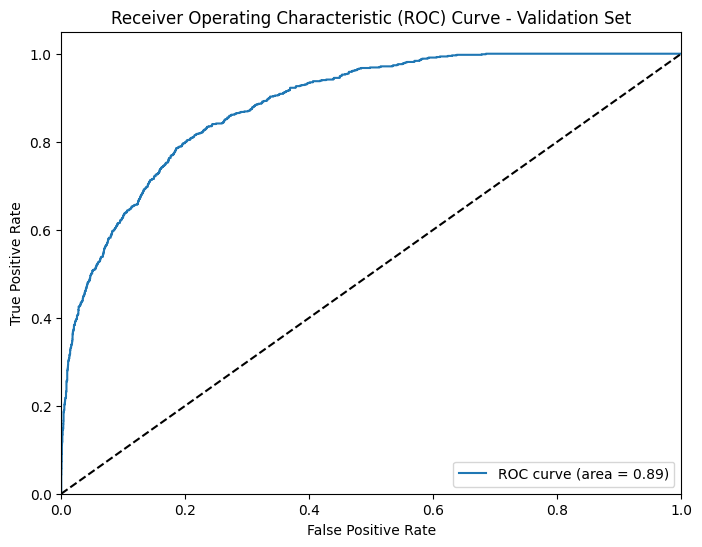

In [201]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

In [202]:
pipeline.fit(X_resampled, y_resampled)

predicted_label = pipeline.predict(X_test_tfidf)

test_df['label'] = predicted_label

test_df['label'].value_counts()

label
0    178014
1     41070
Name: count, dtype: int64

In [204]:
test_df.to_csv('./data/2020_결과_사전.csv', index = False)

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', RandomForestClassifier())  # 랜덤 포레스트 분류기
])

pipeline_rf.fit(X_train, y_train)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val_rf = pipeline_rf.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 정확도 계산
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# 혼동 행렬(confusion matrix) 계산
conf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# 분류 보고서(classification report) 출력
class_report_rf = classification_report(y_val, y_pred_val_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)

# ROC 곡선 및 AUC 계산
y_pred_proba_val_rf = pipeline_rf.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val_rf, tpr_val_rf, thresholds_val_rf = roc_curve(y_val, y_pred_proba_val_rf)
roc_auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)

# ROC 곡선 그리기
plt.figure(figsize = (8, 6))
plt.plot(fpr_val_rf, tpr_val_rf, label='ROC curve (area = %0.2f)' % roc_auc_val_rf)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Random Forest)')
plt.legend(loc = "lower right")
